In [1]:
import Higgs.predictions as HP
from Higgs.tools.ImplementationUtils import readHEPDataCsv, implementMeasurement
from Higgs.tools.MeasurementValidation import *
import Higgs.signals as HS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## ATLAS `VH->WW` 36fb-1 [1903.10052](https://arxiv.org/abs/1903.10052)
No correlations between the two bins are given.

In [2]:
subMeasurements = {
    "HW_WW": {
        "obs": [
            0.67 - np.sqrt(0.27 ** 2 + 0.11 ** 2 + 0.09 ** 2),
            0.67,
            0.67 + np.sqrt(0.31 ** 2 + 0.14 ** 2 + 0.11 ** 2),
        ],
        "process": {"channels": [["HW", "WW"]]},
    },
    "HZ_WW": {
        "obs": [
            0.54 - np.sqrt(0.24 ** 2 + 0.05 ** 2 + 0.05 ** 2),
            0.54,
            0.54 + np.sqrt(0.31 ** 2 + 0.1 ** 2 + 0.11 ** 2),
        ],
        "process": {"channels": [["HZ", "WW"]]},
    },
}
measFile = implementMeasurement(
    "1903.10052",
    "p. 16",
    subMeasurements,
    prefix="WW_VH",
    referenceMass=125,
    massResolution=10,
)

Looks good. Saving this to WW_VH_LHC13_ATLAS_36.json


Compare to [Fig. 8](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HIGG-2017-14/fig_08.png), fits reasonable well.

In [3]:
import Higgs.predictions as HP

meas = HS.Measurement(measFile)

rateZH = np.linspace(0, 2.5)
rateWH = np.linspace(0, 3)


def setRates(particle, zhRate, whRate):
    particle.setChannelRate(meas.collider(), "HZ", "WW", zhRate)
    particle.setChannelRate(meas.collider(), "HW", "WW", whRate)


fig, ax = validateMeasurementRates(meas, rateZH, rateWH, setRates, r"$VH\to WW$")
ref = HP.SMHiggsEW(meas.referenceMass())
ax.plot(
    ref.channelRate(meas.collider(), "HZ", "WW"),
    ref.channelRate(meas.collider(), "HW", "WW"),
    marker="d",
    c="tab:orange",
    ls="none",
    label="SM",
)
ax.legend(loc="upper center", frameon=False)

ax.set_xlabel(r"$\sigma(ZH\to WW)$ [pb]")
ax.set_ylabel(r"$\sigma(WH\to WW)$ [pb]")
plt.show()


## ATLAS `ggH/vbfH->WW` 36fb-1 [1808.09054](https://arxiv.org/abs/1808.09054)

In [4]:
subMeasurements = {
    "H_WW": {
        "obs": [
            11.4 - 2.1,
            11.4,
            11.4 + 2.2,
        ],
        "process": {"channels": [["H", "WW"]]},
    },
    "vbfH_WW": {
        "obs": [
            0.5 - 0.28,
            0.5,
            0.5 + 0.29,
        ],
        "process": {"channels": [["vbfH", "WW"]]},
    },
}
measFile = implementMeasurement(
    "1808.09054",
    "p. 11",
    subMeasurements,
    prefix="WW_H",
    referenceMass=125,
    massResolution=10,
)


Looks good. Saving this to WW_H_LHC13_ATLAS_36.json


Comparison to [Fig. 9](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HIGG-2016-07/fig_09.png)

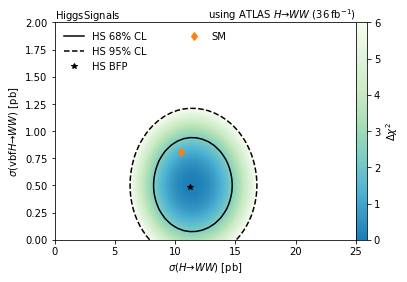

In [5]:
import Higgs.predictions as HP

meas = HS.Measurement(measFile)

rateH = np.linspace(0, 25)
ratevbfH = np.linspace(0, 2)


def setRates(particle, hRate, vbfRate):
    particle.setChannelRate(meas.collider(), "H", "WW", hRate)
    particle.setChannelRate(meas.collider(), "vbfH", "WW", vbfRate)


fig, ax = validateMeasurementRates(meas, rateH, ratevbfH, setRates, r"$H\to WW$")
ref = HP.SMHiggsEW(meas.referenceMass())
ax.plot(
    ref.channelRate(meas.collider(), "H", "WW"),
    ref.channelRate(meas.collider(), "vbfH", "WW"),
    marker="d",
    c="tab:orange",
    ls="none",
    label="SM",
)
ax.legend(loc="upper center", frameon=False)

ax.set_xlabel(r"$\sigma(H\to WW)$ [pb]")
ax.set_ylabel(r"$\sigma(\mathrm{vbf} H\to WW)$ [pb]")
plt.show()


## CMS `H>WW` differential [2007.01984](http://arxiv.org/abs/2007.01984)

In [6]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1805274/Table%203/1/csv"
)
df = dfs[0].rename(columns={"SIG(fiducial)/SIG(SMfiducial)": "obs"})[
    ["obs", "total +", "total -"]
]


def njetName(i):
    return f"{i}j"


bins = {
    njetName(key): {
        "obs": [r["obs"] + r["total -"], r["obs"], r["obs"] + r["total +"]],
        "ref": [1, 1, 1],
        "process": {
            "channels": [
                [p, "WW"] for p in ["H", "vbfH", "HW", "HZ", "Htt", "Ht", "HtW"]
            ]
        },
    }
    for key, r in df.iterrows()
}
# extracted from the equivalent of Fig 4 (right) in the preprint by Tim
bins["0j"]["channelWeights"] = [1.45, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
bins["1j"]["channelWeights"] = [1.0, 1.577, 0.336, 0.274, 2.617, 2.617, 2.617]
bins["2j"]["channelWeights"] = [1.0, 4.715, 3.487, 4.04, 18.015, 18.015, 18.015]
bins["3j"]["channelWeights"] = [1.0, 2.945, 4.43, 4.575, 62.41, 62.41, 62.41]
bins["4j"]["channelWeights"] = [1.0, 3.177, 6.868, 10.266, 214.88, 214.88, 214.88]

dfcorr = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1805274/Table%204/1/csv"
)[0]
corrmat = pd.concat(
    [
        x[["Correlation unregularized fit"]]
        .rename(columns={"Correlation unregularized fit": k})
        .droplevel(0)
        for k, x in dfcorr.set_index(["NJET_1 LOW", "NJET_2 LOW"]).groupby("NJET_1 LOW")
    ],
    axis=1,
).rename(index=njetName, columns=njetName)
measFile = implementMeasurement(
    "2007.01984",
    "https://doi.org/10.17182/hepdata.100162.v1/t3, https://doi.org/10.17182/hepdata.100162.v1/t4, Fig 4 (right)",
    bins,
    corrMatExp=corrmat,
    prefix="WW_H",
    referenceMass=125,
    massResolution=10,
)


Looks good. Saving this to WW_H_LHC13_CMS_137.json


This has a flat direction that is partially resolved by the non-trivial channel weights, leading to this peculiar shape.

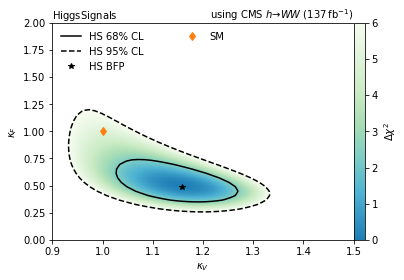

In [8]:
description = r"$h\to WW$"

kappaF = np.linspace(0, 2)
kappaV = np.linspace(0.9, 1.5)


fig, ax = validateMeasurementKappa(
    HS.Measurement(measFile), kappaF, kappaV, description
)
